# Coco Image Presenter

This notebook is intended to visually inspect the images from the Coco dataset. The key part of this notebook is to present randomly selected image along with its bounding boxes

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches #for bounding box
from PIL import Image
import random
import commonPaths
import commonCocoPreprocessingFunctions as preprocFuncs
from importlib import reload
reload(commonPaths)
reload(preprocFuncs);

### Function - presenting random image
In the cell below one can find a function responsible for presenting a random image from the given dataset with corresponding bounding boxes

$showRandomImageWithAnnotations$ - selects and displays random image from the dataset and marks the bounding boxes

In [2]:
def showRandomImageWithAnnotations(directoryPath, imageIdToPropsAndAnnots, categoryIdToNameAndYoloId, showBB=True):
    '''
        ### showRandomImageWithAnnotations
        selects and displays random image from given directory with the bounding boxes

        :param directoryPath: path to the directory with images (with trailing slash)
        :param imageIdToPropsAndAnnots: directory where key=imageId, value=CocoImage object (e.g. result of associateImageIdWithItsPropsAndAnnots)
        :param categoryIdToNameAndYoloId: directory where key=categoryId, value=CocoCategory object (e.g. result of associateCategoryIdWithItsNameAndYoloId)
        :param showBB: defines whether the function should draw bounding boxes (set to True by default)
    '''
    randomImage = random.choice(list(imageIdToPropsAndAnnots.values()))
    img = Image.open(directoryPath+randomImage.fileName)
    fig, ax = plt.subplots()
    print(randomImage.fileName)
    if(showBB):
        imageAnns = imageIdToPropsAndAnnots[randomImage.id].annotations
        for imageAnn in imageAnns:
            category = categoryIdToNameAndYoloId[imageAnn["category_id"]]

            bbox = imageAnn["bbox"]
            x = float(bbox[0])
            y = float(bbox[1])
            width = float(bbox[2])
            height = float(bbox[3])

            colours = random.random(), random.random(), random.random()
            t = plt.text(x+1, y-5, category.categoryName, fontdict={'fontsize':10.0, 'fontweight':'medium','color':'white'})
            t.set_bbox(dict(facecolor=colours, alpha=0.7, edgecolor=colours))
            bb = patches.Rectangle((x,y),width,height, linewidth=2,edgecolor=colours, facecolor="none")
            ax.add_patch(bb)

    ax.imshow(img)
    plt.show()
    

### Data input and selection of random image

000000227482.jpg


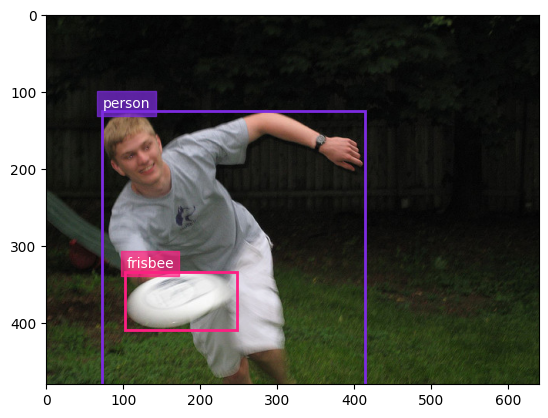

In [3]:
valInstancesJSON = preprocFuncs.getInstancesAsJSON(commonPaths.COCO_VAL_ANNOT_DIR, commonPaths.VAL_ANNOT_FILENAME)
valCategoryIdToNameAndYoloId = preprocFuncs.associateCategoryIdWithItsNameAndYoloId(valInstancesJSON)
valImageIdToPropsAndAnnots = preprocFuncs.associateImageIdWithItsPropsAndAnnots(valInstancesJSON)
showRandomImageWithAnnotations(commonPaths.COCO_VAL_IMG_DIR, valImageIdToPropsAndAnnots, valCategoryIdToNameAndYoloId)